<a href="https://colab.research.google.com/github/antoniocfetngnu/InteligArtificial1/blob/main/regularizacion/CalderonEAntonio_reg_logistica_con_Regularizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Análisis del Dataset

https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package



Antes de iniciar con los modelos. Realizamos un análisis del DataSet que usaremos en el ejercicio, a continuación, se presenta la información disponible en la fuente:

##CONTENIDO
*Este conjunto de datos contiene aproximadamente 10 años de observaciones meteorológicas diarias de muchas ubicaciones en toda Australia.*

*"RainTomorrow" es la variable objetivo a predecir. Significa: ¿llovió el próximo día, Sí o No? Esta columna es "Sí" si la lluvia para ese día fue de 1 mm o más.*



Algunas columnas relevantes en el conjunto de datos:

    Date: la fecha de la observación.
    Location: el lugar (ciudad) de la observación
    MinTemp: mínima temperatura alcanzada
    MaxTemp: máxima temperatura alcanzada
    RainFall: Cantidad de lluvia en mm en el dia de observación
    Evaporation: Cantidad de agua que se evapora
    Sunshine: Cantidad de timpo de luz solar en el día
    WindGustDir:Dirección de mayor ráfaga del viento en el día (solo si existío una ráfaga suficientemente fuerte)
    WindGustSpeed: Velocidad de la ráfaga de viento
    WindGustDir: Dirección de ráfaga de viento
    Humidity9am: humedad a las 9 de la mañana
    Pressure3pm: presión a las 3 de la tarde
    Cloud: nubosidad
    Temp: Temperatura
    RainToday: Si llovió hoy
    RainTomorrow: Si llovió mañana(salida)



##Importación de Librerías
Una vez familiarizados con el contenido del Dataset, proseguiremos a limpiar y acomodar la información antes de realizar la regresión logística. Primero importamos todas las librerías necesarias.

In [26]:
# se utiliza para el manejo de rutas y directorios.
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

Importamos el dataset **weatherAUS**, y comprobamos que se importó correctamente

In [27]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('weatherAUS.csv')
print(df.head())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0      

#Preparación de los Datos
Analizando los datos, podemos observar que varias columnas tienen gran cantidad de nulos (nan, NA) por tanto para tener un modelo exitosos se debe decidir la forma de tratarlos.

In [28]:
# Contar el número de valores NaN
num_nan_wind_gust_speed = df['WindGustSpeed'].isna().sum()
num_nan_wind_gust_dir = df['WindGustDir'].isna().sum()
num_nan_wind_gust_speed9 = df['WindSpeed9am'].isna().sum()
num_nan_wind_gust_speed3 = df['WindSpeed3pm'].isna().sum()


num_nan_windGustDir = df['WindGustDir'].isna().sum()
num_nan_windDir3pm = df['WindDir3pm'].isna().sum()
num_nan_windDir9am = df['WindDir9am'].isna().sum()

num_nan_pressure9am = df['Pressure9am'].isna().sum()
num_nan_pressure3pm = df['Pressure3pm'].isna().sum()

num_nan_cloud9am = df['Cloud9am'].isna().sum()
num_nan_cloud3pm = df['Cloud3pm'].isna().sum()

num_nan_humidity9am = df['Humidity9am'].isna().sum()
num_nan_humidity3pm = df['Humidity3pm'].isna().sum()

num_nan_temp9am = df['Temp9am'].isna().sum()
num_nan_temp3pm = df['Temp3pm'].isna().sum()

num_nan_rainToday = df['RainToday'].isna().sum()
num_nan_rainTomorrow = df['RainTomorrow'].isna().sum()

#----------------------------
print("Número de valores NaN en la columna 'WindGustSpeed':", num_nan_wind_gust_speed)
print("Número de valores NaN en la columna 'WindGustDir':", num_nan_wind_gust_dir)
print("Número de valores NaN en la columna 'WindSpeed9am':", num_nan_wind_gust_speed9)
print("Número de valores NaN en la columna 'WindSpeed3pm':", num_nan_wind_gust_speed3)
print('--'*30)
print("Número de valores NaN en la columna 'WindGustDir':", num_nan_windGustDir)
print("Número de valores NaN en la columna 'WindDir3pm':", num_nan_windDir3pm)
print("Número de valores NaN en la columna 'WindDir9am':", num_nan_windDir9am)
print('--'*30)
print("Número de valores NaN en la columna 'Pressure9am':", num_nan_pressure9am)
print("Número de valores NaN en la columna 'Pressure3pm':", num_nan_pressure3pm)
print('--'*30)
print("Número de valores NaN en la columna 'Cloud9am':", num_nan_cloud9am)
print("Número de valores NaN en la columna 'Cloud3pm':", num_nan_cloud3pm)
print('--'*30)
print("Número de valores NaN en la columna 'Humidity9am':", num_nan_humidity9am)
print("Número de valores NaN en la columna 'Humidity3pm':", num_nan_humidity3pm)
print("Número de valores NaN en la columna 'Temp9am':", num_nan_temp9am)
print("Número de valores NaN en la columna 'Temp3pm':", num_nan_temp3pm)
print('--'*30)
print("Número de valores NaN en la columna 'RainToday':", num_nan_rainToday)
print("Número de valores NaN en la columna 'RainTomorrow':", num_nan_rainTomorrow)

Número de valores NaN en la columna 'WindGustSpeed': 10263
Número de valores NaN en la columna 'WindGustDir': 10326
Número de valores NaN en la columna 'WindSpeed9am': 1767
Número de valores NaN en la columna 'WindSpeed3pm': 3062
------------------------------------------------------------
Número de valores NaN en la columna 'WindGustDir': 10326
Número de valores NaN en la columna 'WindDir3pm': 4228
Número de valores NaN en la columna 'WindDir9am': 10566
------------------------------------------------------------
Número de valores NaN en la columna 'Pressure9am': 15065
Número de valores NaN en la columna 'Pressure3pm': 15028
------------------------------------------------------------
Número de valores NaN en la columna 'Cloud9am': 55888
Número de valores NaN en la columna 'Cloud3pm': 59358
------------------------------------------------------------
Número de valores NaN en la columna 'Humidity9am': 2654
Número de valores NaN en la columna 'Humidity3pm': 4507
Número de valores NaN en

Como se puede observar, tenemos muchas columnas con valores NaN, a continuación se hace el análisis y tratado de los datos:

###Llenado de valores NaN con las medias

Los valores nulos en las columnas se llenan con las **medias** porque la **media** es una medida central que representa el **valor típico** de los datos en esas columnas. Al llenar los espacios vacíos con la media, estamos reemplazando los valores faltantes con un **valor que es representativo** del conjunto de datos en su conjunto, lo que ayuda a preservar la estructura y la distribución de los datos originales. Esto nos permite mantener la integridad de los datos y utilizar la información disponible de manera eficiente para análisis posteriores o modelos de predicción.

Hay que aclarar que esto se realiza a las columnas cuyo análisis nos entregue que se pueda realizar esta adaptación, en otras columnas no se puede realizar esto.
Por tanto:

In [29]:
# Llenar los valores nulos en las columnas "MinTemp" y "MaxTemp" con las medias, tambien se hizo para pressure9am..3pm
mean_tempMin = df["MinTemp"].mean()
df["MinTemp"] = df["MinTemp"].fillna(mean_tempMin)
mean_tempMax = df["MaxTemp"].mean()
df["MaxTemp"] = df["MaxTemp"].fillna(mean_tempMax)

mean_pressure9am = df["Pressure9am"].mean()
df["Pressure9am"] = df["Pressure9am"].fillna(mean_pressure9am)
mean_pressure3pm = df["Pressure3pm"].mean()
df["Pressure3pm"] = df["Pressure3pm"].fillna(mean_pressure3pm)

mean_cloud9am = df["Cloud9am"].mean()
df["Cloud9am"] = df["Cloud9am"].fillna(mean_cloud9am)
mean_could3pm = df["Cloud3pm"].mean()
df["Cloud3pm"] = df["Cloud3pm"].fillna(mean_could3pm)

mean_hum9am = df["Humidity9am"].mean()
df["Humidity9am"] = df["Humidity9am"].fillna(mean_hum9am)
mean_hum3pm = df["Humidity3pm"].mean()
df["Humidity3pm"] = df["Humidity3pm"].fillna(mean_hum3pm)

mean_temp9am = df["Temp9am"].mean()
df["Temp9am"] = df["Temp9am"].fillna(mean_temp9am)
mean_temp3pm = df["Temp3pm"].mean()
df["Temp3pm"] = df["Temp3pm"].fillna(mean_temp3pm)

### Llenado de valores con NaN con *0*
Una vez llenados con la media a las columnas que se puede aplicar esta técnica, toca **llenar con 0 en lugar de la media a otras columnas** que después de un análisis, no parece correcto aplicar la media debido a la variedad de datos que no se representan con la media. Entonces:

In [30]:
#Rainfall, Evaporation y Sunshine
df['Rainfall'] = df["Rainfall"].fillna(0)
df['Evaporation'] = df["Evaporation"].fillna(0)
df['Sunshine'] = df["Sunshine"].fillna(0)

Para nuestro ejercicio, tenemos columnas que a pesar de representar un dato binario, lo hacen mediante Strings, por tanto debemos adaptarlos a un valor numérico con el fin de poder realizar la regresión logística, por tanto:

In [31]:
#mapeamos a 0 y 1 RainToday y RainTomorrow
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

###Eliminación de Tuplas
En algunos pasos, luego de analizar los datos, se llega a la conclusión que no es correcto sacar la media, tampoco llenar los valores con 0 (afectaría negativamente asumiendo 0), por tanto se procede a la eliminación de la tupla entera conteniendo los valores NaN de las columnas aun no tratadas:

In [32]:
#Eliminacion de los valores nulos en WindGustDir, WindGustSpeed, WindSpeed9am, WindSpeed9am, WindSpeed3pm, WindDir3pm, WindDir9am
df = df.dropna(subset=['WindGustDir'])
df = df.dropna(subset=['WindGustSpeed'])
df = df.dropna(subset=['WindSpeed9am'])
df = df.dropna(subset=['WindSpeed3pm'])
df = df.dropna(subset=['WindDir3pm'])
df = df.dropna(subset=['WindDir9am'])
df = df.dropna(subset=['RainToday'])
df = df.dropna(subset=['RainTomorrow'])

Ahora comprobamos como quedaron las columnas luego de la adaptación anterior:

In [33]:
#Contar el número de valores NaN
num_nan_wind_gust_speed = df['WindGustSpeed'].isna().sum()
num_nan_wind_gust_dir = df['WindGustDir'].isna().sum()
num_nan_wind_gust_speed9 = df['WindSpeed9am'].isna().sum()
num_nan_wind_gust_speed3 = df['WindSpeed3pm'].isna().sum()


num_nan_windGustDir = df['WindGustDir'].isna().sum()
num_nan_windDir3pm = df['WindDir3pm'].isna().sum()
num_nan_windDir9am = df['WindDir9am'].isna().sum()

num_nan_pressure9am = df['Pressure9am'].isna().sum()
num_nan_pressure3pm = df['Pressure3pm'].isna().sum()

num_nan_cloud9am = df['Cloud9am'].isna().sum()
num_nan_cloud3pm = df['Cloud3pm'].isna().sum()

num_nan_humidity9am = df['Humidity9am'].isna().sum()
num_nan_humidity3pm = df['Humidity3pm'].isna().sum()

num_nan_temp9am = df['Temp9am'].isna().sum()
num_nan_temp3pm = df['Temp3pm'].isna().sum()

num_nan_rainToday = df['RainToday'].isna().sum()
num_nan_rainTomorrow = df['RainTomorrow'].isna().sum()

#----------------------------
print("Número de valores NaN en la columna 'WindGustSpeed':", num_nan_wind_gust_speed)
print("Número de valores NaN en la columna 'WindGustDir':", num_nan_wind_gust_dir)
print("Número de valores NaN en la columna 'WindSpeed9am':", num_nan_wind_gust_speed9)
print("Número de valores NaN en la columna 'WindSpeed3pm':", num_nan_wind_gust_speed3)
print('--'*30)
print("Número de valores NaN en la columna 'WindGustDir':", num_nan_windGustDir)
print("Número de valores NaN en la columna 'WindDir3pm':", num_nan_windDir3pm)
print("Número de valores NaN en la columna 'WindDir9am':", num_nan_windDir9am)
print('--'*30)
print("Número de valores NaN en la columna 'Pressure9am':", num_nan_pressure9am)
print("Número de valores NaN en la columna 'Pressure3pm':", num_nan_pressure3pm)
print('--'*30)
print("Número de valores NaN en la columna 'Cloud9am':", num_nan_cloud9am)
print("Número de valores NaN en la columna 'Cloud3pm':", num_nan_cloud3pm)
print('--'*30)
print("Número de valores NaN en la columna 'Humidity9am':", num_nan_humidity9am)
print("Número de valores NaN en la columna 'Humidity3pm':", num_nan_humidity3pm)
print("Número de valores NaN en la columna 'Temp9am':", num_nan_temp9am)
print("Número de valores NaN en la columna 'Temp3pm':", num_nan_temp3pm)
print('--'*30)
print("Número de valores NaN en la columna 'RainToday':", num_nan_rainToday)
print("Número de valores NaN en la columna 'RainTomorrow':", num_nan_rainTomorrow)

Número de valores NaN en la columna 'WindGustSpeed': 0
Número de valores NaN en la columna 'WindGustDir': 0
Número de valores NaN en la columna 'WindSpeed9am': 0
Número de valores NaN en la columna 'WindSpeed3pm': 0
------------------------------------------------------------
Número de valores NaN en la columna 'WindGustDir': 0
Número de valores NaN en la columna 'WindDir3pm': 0
Número de valores NaN en la columna 'WindDir9am': 0
------------------------------------------------------------
Número de valores NaN en la columna 'Pressure9am': 0
Número de valores NaN en la columna 'Pressure3pm': 0
------------------------------------------------------------
Número de valores NaN en la columna 'Cloud9am': 0
Número de valores NaN en la columna 'Cloud3pm': 0
------------------------------------------------------------
Número de valores NaN en la columna 'Humidity9am': 0
Número de valores NaN en la columna 'Humidity3pm': 0
Número de valores NaN en la columna 'Temp9am': 0
Número de valores NaN 

## Tratado y conversión de variables cíclicas
De la misma forma, al igual que en el anterior ejercicio, hay que volver en cíclicas las variables que así se necesiten, recordando que esto se aplica a variables donde en un valor elevado específico vuelven a su valor inicial (ciclicas), por ejemplo los meses: siendo Enero 1 y Diciembre 12, luego de Dicembre, viene nuevamente 1 (ciclica) y debemos encontrar una forma de representar la cercanía entre ambos valores.
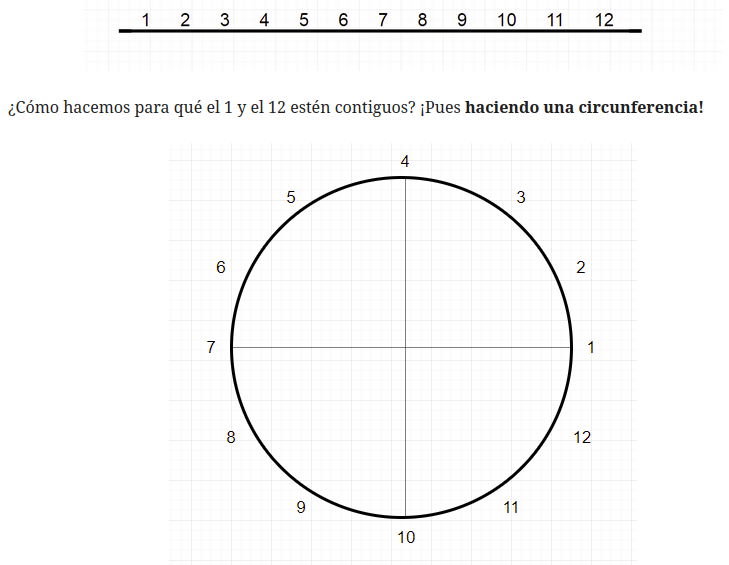

Ya que en la predicción de lluvia, es importante las estaciones, aplicaremos la variable cíclica a los meses del año (extrayendo de la columna Date), de la misma forma, en las direcciones del viento (Norte, Sur, Sureste) debemos volverlo cíclicas. Entonces:

In [34]:
# Convertir las direcciones del viento en grados
direccion_grados = {
    'N': 0,
    'NNE': 22.5,
    'NE': 45,
    'ENE': 67.5,
    'E': 90,
    'ESE': 112.5,
    'SE': 135,
    'SSE': 157.5,
    'S': 180,
    'SSW': 202.5,
    'SW': 225,
    'WSW': 247.5,
    'W': 270,
    'WNW': 292.5,
    'NW': 315,
    'NNW': 337.5
}

# Convertir la columna de direcciones del viento en grados
df['WindGustDir'] = df['WindGustDir'].map(direccion_grados)
df['WindDir9am'] = df['WindDir9am'].map(direccion_grados)
df['WindDir3pm'] = df['WindDir3pm'].map(direccion_grados)

## One Hot Encoding (antes de proseguir con V. Ciclicas)
Antes de proseguir con la adaptación a cíclicas las variables de dirección de viento y mese, nos encontramos con que unas columnas cuentan con una característica de texto categórica, que no se puede adaptar ordinalmente por tanto, toca aplicar el **one-hot encoding**

In [35]:
ocurrencias = df['Location'].value_counts()
# Aplicar one-hot encoding a la columna "Location"
one_hot_encoded = pd.get_dummies(df['Location'])
# Convertir a enteros (1 y 0)
one_hot_encoded = one_hot_encoded.astype(int)
# Concatenar el DataFrame original con el DataFrame one-hot encoded
df_encoded = pd.concat([df, one_hot_encoded], axis=1)
df_encoded.drop('Location', axis=1, inplace=True)

Continuación de tratado de **variables cíclica**s

In [36]:
#CONVERTIR A DATETIME LA COLUMNA Date
df_encoded['Date'] = pd.to_datetime(df['Date'])

# Extraer el mes de la fecha y crear una nueva columna "month"
df_encoded['Month'] = df_encoded['Date'].dt.month

In [37]:
#TRATAMIENTO DE LAS VARIABLES CICLICAS
# Obtener el mes de la columna 'Month'
meses = df_encoded['Month']

# Calcular el ángulo para el seno y el coseno
alpha = (meses - 1) * 2 * np.pi / 12

# Calcular las representaciones cíclicas de los meses
meses_ciclicos = pd.DataFrame()
meses_ciclicos['original']= df_encoded['Month']
meses_ciclicos['mes_seno'] = np.sin(alpha)
meses_ciclicos['mes_coseno'] = np.cos(alpha)
# Verificar las representaciones cíclicas
print("Representaciones cíclicas de los meses:")
print(meses_ciclicos.head(10))

Representaciones cíclicas de los meses:
   original  mes_seno  mes_coseno
0        12      -0.5    0.866025
1        12      -0.5    0.866025
2        12      -0.5    0.866025
3        12      -0.5    0.866025
4        12      -0.5    0.866025
5        12      -0.5    0.866025
6        12      -0.5    0.866025
7        12      -0.5    0.866025
8        12      -0.5    0.866025
9        12      -0.5    0.866025


Una vez comprobada la correcta adaptción de los meses a cíclico, debemos concatenarlo a un nuevo dataframe que incluya estos datos. Entonces:

In [38]:
meses_ciclicos.drop('original', axis=1, inplace=True)


# Concatenar las representaciones cíclicas con el DataFrame original
df_ciclico= pd.concat([df_encoded, meses_ciclicos], axis=1)

Ahora, debemos realizar el mismo procedimiento para las direcciones del viento:

In [39]:
# Obtener la dirección del viento del DataFrame
windGustDir = df_ciclico['WindGustDir']
windDir9am = df_ciclico['WindDir9am']
windDir3pm = df_ciclico['WindDir3pm']


# Convertir las direcciones de viento de grados a radianes
windGustDirRad = windGustDir * np.pi / 180
windDirRad9am = windDir9am * np.pi / 180
windDirRad3pm = windDir3pm * np.pi / 180

# Calcular el seno y el coseno de los ángulos
sen_windGustDir = np.sin(windGustDirRad)
cos_windGustDir = np.cos(windGustDirRad)

sen_windDirRad9am = np.sin(windDirRad9am)
cos_windDirRad9am = np.cos(windDirRad9am)

sen_windDirRad3pm = np.sin(windDirRad3pm)
cos_windDirRad3pm = np.cos(windDirRad3pm)

# Agregar las representaciones cíclicas al DataFrame original
df_ciclico['WindGustDir_Sen'] = sen_windGustDir
df_ciclico['WindGustDir_Cos'] = cos_windGustDir

df_ciclico['WindDir9am_Sen'] = sen_windDirRad9am
df_ciclico['WindDir9am_Cos'] = cos_windDirRad9am

df_ciclico['WindDir3pm_Sen'] = sen_windDirRad3pm
df_ciclico['WindDir3pm_Cos'] = cos_windDirRad3pm

Comprobamos como va quedando el dataframe con la aplicación de variables ciclicas:

In [40]:
print(df_ciclico.head())

        Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0 2008-12-01     13.4     22.9       0.6          0.0       0.0        270.0   
1 2008-12-02      7.4     25.1       0.0          0.0       0.0        292.5   
2 2008-12-03     12.9     25.7       0.0          0.0       0.0        247.5   
3 2008-12-04      9.2     28.0       0.0          0.0       0.0         45.0   
4 2008-12-05     17.5     32.3       1.0          0.0       0.0        270.0   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0       270.0       292.5          20.0          24.0   
1           44.0       337.5       247.5           4.0          22.0   
2           46.0       270.0       247.5          19.0          26.0   
3           24.0       135.0        90.0          11.0           9.0   
4           41.0        67.5       315.0           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0        

Ahora debemos eliminar las columnas originales, ya que tenemos ahora el equivalente cíclico, Entonces:

In [41]:
df_ciclico.drop('Date', axis=1, inplace=True)
df_ciclico.drop('Month', axis=1, inplace=True)
df_ciclico.drop('WindGustDir',axis=1, inplace=True)
df_ciclico.drop('WindDir9am',axis=1, inplace=True)
df_ciclico.drop('WindDir3pm',axis=1, inplace=True)
print(df_ciclico.head())

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          0.0       0.0           44.0   
1      7.4     25.1       0.0          0.0       0.0           44.0   
2     12.9     25.7       0.0          0.0       0.0           46.0   
3      9.2     28.0       0.0          0.0       0.0           24.0   
4     17.5     32.3       1.0          0.0       0.0           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0       1007.1  8.000000   4.50993     16.9     21.8       

In [42]:
print(df_ciclico.describe())

             MinTemp        MaxTemp       Rainfall    Evaporation  \
count  123710.000000  123710.000000  123710.000000  123710.000000   
mean       12.413917      23.474808       2.375661       3.312966   
std         6.366792       7.205898       8.528039       4.258824   
min        -8.500000      -4.800000       0.000000       0.000000   
25%         7.800000      18.100000       0.000000       0.000000   
50%        12.200000      23.000000       0.000000       2.000000   
75%        17.000000      28.600000       0.800000       5.600000   
max        33.900000      48.100000     367.600000      86.200000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  123710.000000  123710.000000  123710.000000  123710.000000   
mean        4.185621      40.685280      15.011689      19.174578   
std         4.746062      13.388636       8.307285       8.571039   
min         0.000000       7.000000       2.000000       2.000000   
25%         0.000000      31.0000

Una vez con todos los datos acomodados, procedemos a realizar finalmente los pasos para realizar la regresión logística.

###Separación de datos de entrenamiento y prueba
Primero se separa en X_train, X_test, Y_train y Y_Test los datos con una semilla aleatoria, tomando 80% de los datos para entrenamiento y 20% para prueba.
Además se realiza la estandarización(normalización) de los datos. (solo se normaliza las características X)

In [43]:
X = df_ciclico.drop(columns=['RainTomorrow'])
Y = df_ciclico['RainTomorrow']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Normalizar características solo en los conjuntos de entrenamiento y prueba
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Luego definimos la funcion de sigmoide y probamos si realmente valores de 0 se vuelven 0.5




In [44]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

# Prueba la implementacion de la funcion sigmoid
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


Ahora, debemos aumentar el bias a la X de entrenamiento.

In [45]:
# Configurar la matriz adecuadamente y agregar una columna de unos que corresponde al término de intercepción.
m_train, n_train = X_train_scaled.shape
# Agregar el término de intercepción a X_train_scaled
X_train_scaled_with_intercept = np.concatenate([np.ones((m_train, 1)), X_train_scaled], axis=1)

<a id="section2"></a>
#### 1.2.2 Función de Costo y Gradiente

Declaramos la funcíon de costo y del Descenso por el Gradiente.

In [46]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
        if i % 1000 == 0:
            print(f"Iteración {i}: Costo = {J_history[-1]}")
    return theta, J_history

###Funcion de Costo y Gradiente aplicando Regularizacion

In [54]:
def calcularCostoReg(theta, X, y, lambda_reg):
    # Inicializar algunos valores útiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    # Calcular el término de regularización (sin incluir el término de sesgo)
    regularization_term = (lambda_reg / (2 * m)) * np.sum(np.square(theta[1:]))

    # Agregar el término de regularización al costo
    J += regularization_term

    return J

def descensoGradienteReg(theta, X, y, alpha, num_iters, lambda_reg):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento
    n = X.shape[1] # numero de características

    # realiza una copia de theta, el cual será actualizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))

        # Calcular el gradiente con regularización Ridge
        grad_reg = (1 / m) * X.T.dot(h - y) + (lambda_reg / m) * theta
        grad_reg[0] -= (lambda_reg / m) * theta[0]  # No regularizar el término de intercepción

        # Actualizar theta con el gradiente regularizado
        theta -= alpha * grad_reg

        # Calcular el costo con regularización y guardarlo en el historial
        J_history.append(calcularCostoReg(theta, X, y, lambda_reg))

        if i % 1000 == 0:
            print(f"Iteración {i}: Costo = {J_history[-1]}")

    return theta, J_history


Aplicamos las funciones con nuestra X de entrenamiento, Y de entrenamiento, thethas y parametro alpha y numero de iteraciones. Entonces:

###Calculo de thithas sin regularizacion

Iteración 0: Costo = 0.6911947509861984
Iteración 1000: Costo = 0.3864326442936333
Iteración 2000: Costo = 0.360144537562099
Iteración 3000: Costo = 0.35212447941309166
Iteración 4000: Costo = 0.3486454123417939
Iteración 5000: Costo = 0.34683683979851776
Iteración 6000: Costo = 0.34577721833915037
Iteración 7000: Costo = 0.3450969720467753
Theta calculado por el descenso por el gradiente: [-1.87751450e+00  1.99200079e-01 -5.59254613e-02  7.84007803e-02
  4.66849338e-02 -2.74434557e-01  6.73634289e-01 -7.87029104e-02
 -1.89978711e-01  1.66927037e-01  1.05704018e+00  1.27220281e-02
 -3.91569986e-01  6.77832868e-02  3.35326970e-01  1.46407011e-01
 -1.03854904e-01  1.65639527e-01  1.00280579e-01  1.75112112e-02
  1.51310172e-02  1.32836415e-02 -8.46826130e-02 -1.15697967e-02
  8.36516546e-02  1.25104906e-02  6.48585036e-05  7.02744312e-03
  1.03765703e-02  4.91772212e-02 -4.42096948e-02 -5.25613498e-02
 -3.23053313e-02 -9.55022396e-02 -6.10862429e-02  1.63854554e-02
 -1.42206757e-02  2.33

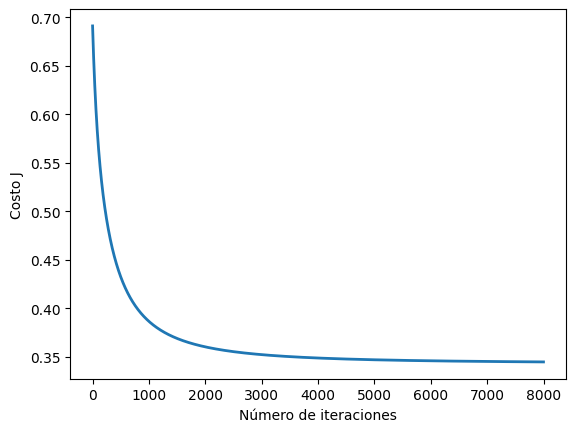

In [23]:
# Elegir algún valor para alpha (probar varias alternativas)
alpha = 0.008   #0.001
num_iters = 8000   #40000

# Inicializa theta con ceros
theta = np.zeros(X_train_scaled_with_intercept.shape[1])

#Ejecucion del descenso por el gradiente
theta, J_history = descensoGradiente(theta, X_train_scaled_with_intercept, Y_train, alpha, num_iters)
#Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')
print('Theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

###Calculo de thithas con regularizacion

Iteración 0: Costo = 0.6911949132453385
Iteración 1000: Costo = 0.39700703818044497
Iteración 2000: Costo = 0.376780336564304
Iteración 3000: Costo = 0.37252086577612875
Iteración 4000: Costo = 0.37134992461418537
Iteración 5000: Costo = 0.37098703966939456
Iteración 6000: Costo = 0.3708661907619815
Iteración 7000: Costo = 0.37082359824255295
Theta calculado por el descenso por el gradiente: [-1.74003069e+00  1.64392774e-01 -7.19770085e-02  9.18290216e-02
  2.05611285e-02 -2.07590947e-01  4.31284189e-01 -2.10619269e-02
 -8.36263088e-02  1.81512801e-01  7.25375027e-01 -9.74477171e-02
 -2.69166980e-01  1.11681641e-01  2.99134573e-01  9.33669312e-02
 -1.21966776e-01  1.72706455e-01  6.94614207e-02  4.59836604e-03
 -1.50034190e-03  9.54861745e-03 -6.51471661e-02 -1.49062425e-02
  6.72929864e-02  2.82426847e-02 -1.17304131e-02 -3.16214564e-03
  2.02111563e-02  4.25593464e-02 -1.87940568e-02 -2.37549382e-02
 -2.68846301e-02 -5.57157759e-02 -4.63509270e-02  5.68576985e-03
 -1.67798379e-02 -7.

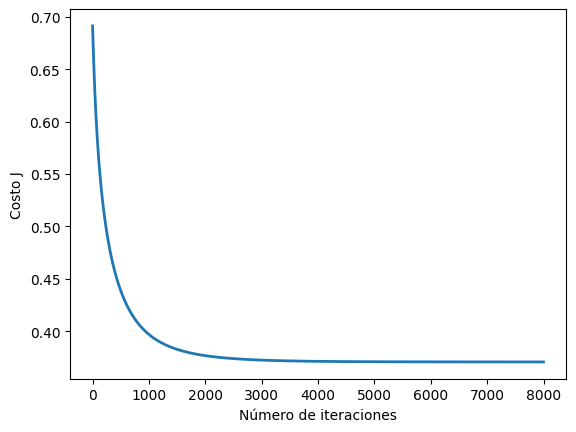

In [55]:
# Elegir algún valor para alpha (probar varias alternativas)
alpha = 0.008   #0.001
num_iters = 8000   #40000
lambda_reg=3000
# Inicializa theta con ceros
thetaR = np.zeros(X_train_scaled_with_intercept.shape[1])

#Ejecucion del descenso por el gradiente
thetaR, J_historyR = descensoGradienteReg(thetaR, X_train_scaled_with_intercept, Y_train, alpha, num_iters,lambda_reg)
#Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_historyR)), J_historyR, lw=2)
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')
print('Theta calculado por el descenso por el gradiente: {:s}'.format(str(thetaR)))

Una vez obtenidas las thithas, ahora debemos calcular las Y predichas mediante el sigmoide

####Predicciones sin regularizacion

In [57]:
m, n = X_test_scaled.shape
#aumentamos el bias a la X de prueba
X_test_scaled_with_intercept = np.concatenate([np.ones((m, 1)), X_test_scaled], axis=1)
# Calcular las predicciones utilizando la función sigmoide y los parámetros theta
predictions = sigmoid(np.dot(X_test_scaled_with_intercept, theta))

####Predicciones con regularizacion

In [58]:
predictionsR = sigmoid(np.dot(X_test_scaled_with_intercept, thetaR))

Imprimimos las predicciones y tenemos:

In [60]:
# Imprimir las predicciones
print("-"*20)
print("Predicciones")
print(predictions)
print("Predicciones con regularizacion")
print(predictionsR)

--------------------
Predicciones
[0.48351608 0.16482272 0.37755131 ... 0.04949582 0.03727043 0.03823483]
Predicciones con regularizacion
[0.46985804 0.20245237 0.29368296 ... 0.05964472 0.06873821 0.04816334]


Como podemos observar, las predicciones van en un rango de 0 a 1 continuo, por tanto, como ya está aplicada el sigmoide, debemos elegir un umbral para volverlo 0 y 1 para poder comparar con las Y de prueba. Entonces:

In [61]:
umbral = 0.5
etiquetas_binarias = (predictions >= umbral).astype(int)
etiquetas_binariasR = (predictionsR >= umbral).astype(int)
print("sin regularizar")
print(etiquetas_binarias)
print("regularizando")
print(etiquetas_binariasR)

sin regularizar
[0 0 0 ... 0 0 0]
regularizando
[0 0 0 ... 0 0 0]


Finalmente vemos el porcentaje de precisión del modelo, comparando las Y predichas y las Y de prueba.

In [62]:
precision = accuracy_score(Y_test, etiquetas_binarias)
print("Precisión del modelo sin regularizar:", precision)
precisionR = accuracy_score(Y_test, etiquetas_binariasR)
print("Precisión del modelo regularizando:", precisionR)

Precisión del modelo sin regularizar: 0.8499312909223183
Precisión del modelo regularizando: 0.8461320830975669


Con esto se concluye el ejercicio, obteniendo un modelo con un 85% de precisión en ambos casos, pero si somos mas minuciosos podemos ver que es un poco menos preciso despues de aplicar la regularizacion.